<a href="https://colab.research.google.com/github/pemba007/glass-ml/blob/main/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# Installing required packages if required
!pip install scikit-plot

In [21]:
# Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
# Ignoring warnings
import warnings
warnings.filterwarnings(action='ignore')

In [23]:
# Reading the data
data_columns = ['Id', "RI" ,"Na" ,"Mg" ,"Al" ,"Si" ,"K" ,"Ca" ,"Ba", "Fe", "Glass_Type"]
df = pd.read_csv("./glass.data", names = data_columns)

In [24]:
# Checking the dataframe
df.head

<bound method NDFrame.head of       Id       RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Glass_Type
0      1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0           1
1      2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0           1
2      3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0           1
3      4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0           1
4      5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0           1
..   ...      ...    ...   ...   ...    ...   ...   ...   ...  ...         ...
209  210  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0           7
210  211  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0           7
211  212  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0           7
212  213  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0           7
213  214  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0           7

[214 rows x 11 column

In [25]:
# Checking the shape of the dataframe
df.shape

(214, 11)

In [26]:
# Checking for the data set values
df.describe()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


## Checking the distribution

In [27]:
# Checking the skewness
df.skew()

Id            0.000000
RI            1.625431
Na            0.454181
Mg           -1.152559
Al            0.907290
Si           -0.730447
K             6.551648
Ca            2.047054
Ba            3.416425
Fe            1.754327
Glass_Type    1.114915
dtype: float64

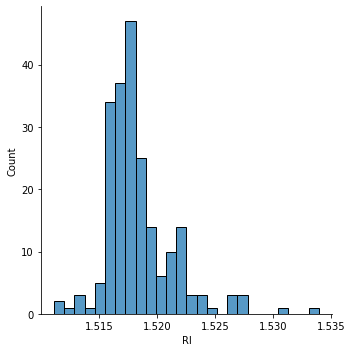

In [28]:
sns.displot(df['RI'])

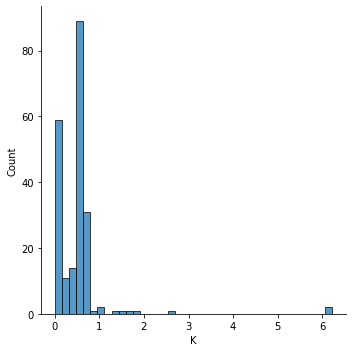

In [29]:
sns.displot(df['K'])

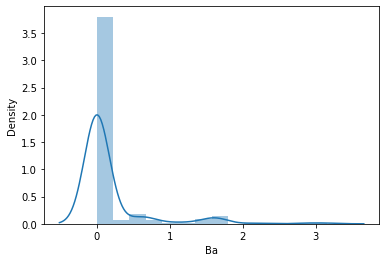

In [30]:
sns.distplot(df['Ba'])

# Preprocessing

In [31]:
# Removing the target variable
y = df['Glass_Type']
df.drop(columns = ['Glass_Type'], inplace = True)

## Normalization & Quantile Transformer

In [32]:
# Preprocessing
from sklearn.preprocessing import Normalizer, QuantileTransformer
from sklearn.pipeline import FeatureUnion

ct = FeatureUnion([("norm1", Normalizer(norm='l1')),("quantlie", QuantileTransformer(n_quantiles=10))])
df = ct.fit_transform(df)

# Training Model

## Searching for the best parameters

In [33]:
# Searching for the best parameters

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Defining the parameters search
parameters = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'), 'C':range(20), 'degree' : range(10)}
svc = SVC()

# Searching through all combination
clf = GridSearchCV(svc, parameters, n_jobs=-1, cv=5)
clf.fit(df, y)
print("The best parameters are" , clf.best_params_)

The best parameters are {'C': 15, 'degree': 0, 'kernel': 'rbf'}


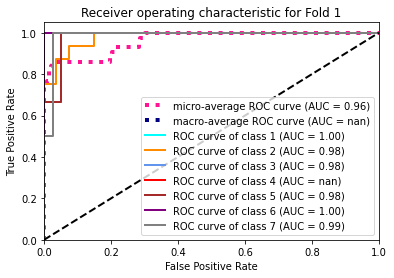

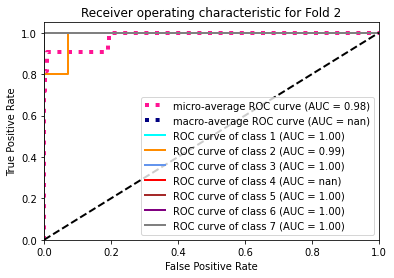

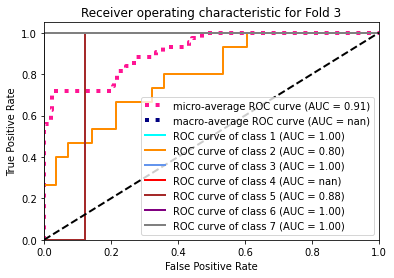

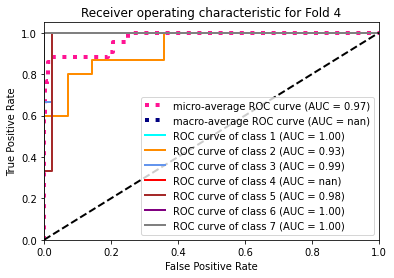

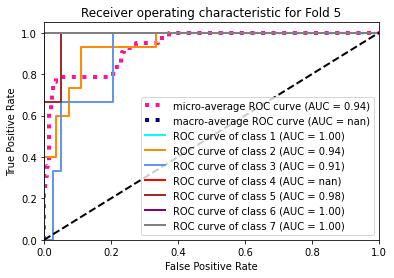

In [34]:
# Model training

import scikitplot as skplt
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import label_binarize
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score, multilabel_confusion_matrix, accuracy_score

from itertools import cycle

skf = StratifiedKFold(n_splits=5)

# Defining classifier with the best parameters
classifier = SVC(probability=True, C = 15, degree = 0, kernel = 'rbf')

clf = OneVsRestClassifier(classifier)
fold = 0

actual_classes = list()
predicted_classes = list()

for train_index, test_index in skf.split(df, y):
  fold += 1
  X_train, X_test = df[train_index], df[test_index]
  y_train, y_test = y[train_index], y[test_index]

  # Binarize the output
  before_y_train = y_train
  before_y_test = y_test
  y_train = label_binarize(y_train, classes=[1, 2, 3, 4, 5, 6, 7])
  y_test = label_binarize(y_test, classes=[1, 2, 3, 4, 5, 6, 7])
  n_classes = len(y_train[1])

  # y_pred = classifier.fit(X_train, y_train).predict(X_test)
  clf.fit(X_train, y_train)
  y_pred = clf.decision_function(X_test)

  y_actual_classes = classifier.fit(X_train, before_y_train).predict(X_test)

  actual_classes = np.append(actual_classes, before_y_test)
  predicted_classes = np.append(predicted_classes, y_actual_classes)

  # Compute ROC curve and ROC area for each class
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

  # Compute micro-average ROC curve and ROC area
  fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
  roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
  lw = 2

  # First aggregate all false positive rates
  all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

  # Then interpolate all ROC curves at this points
  mean_tpr = np.zeros_like(all_fpr)
  for i in range(n_classes):
      mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

  # Finally average it and compute AUC
  mean_tpr /= n_classes

  fpr["macro"] = all_fpr
  tpr["macro"] = mean_tpr
  roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

  # Plot all ROC curves
  plt.figure()
  plt.plot(
      fpr["micro"],
      tpr["micro"],
      label="micro-average ROC curve (AUC = {0:0.2f})".format(roc_auc["micro"]),
      color="deeppink",
      linestyle=":",
      linewidth=4,
  )

  plt.plot(
      fpr["macro"],
      tpr["macro"],
      label="macro-average ROC curve (AUC = {0:0.2f})".format(roc_auc["macro"]),
      color="navy",
      linestyle=":",
      linewidth=4,
  )

  colors = cycle(["aqua", "darkorange", "cornflowerblue", 'red', "brown", 'purple', 'grey'])
  for i, color in zip(range(n_classes), colors):
      plt.plot(
          fpr[i],
          tpr[i],
          color=color,
          lw=lw,
          label="ROC curve of class {0} (AUC = {1:0.2f})".format(i+1, roc_auc[i]),
      )

  plt.plot([0, 1], [0, 1], "k--", lw=lw)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title(f"Receiver operating characteristic for Fold {fold}")
  plt.legend(loc="lower right")
  plt.show()
  

In [35]:
# Calculating the metrics
cm = multilabel_confusion_matrix(actual_classes, predicted_classes, labels= range(1,8))

res = []

for l in range(7):
    x = cm[l]
    tn, fp = x[0]
    fn, tp = x[1]
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    f1 = (2 * precision * sensitivity) / (precision + sensitivity)
    res.append([l+1,sensitivity, specificity, f1])

frame = pd.DataFrame(res, columns = ['Class','Sensitivity(Recall)','Specificity', 'F1 score'])

frame['F1 score'] = frame['F1 score'].fillna(0)
frame['Sensitivity(Recall)'] = frame['Sensitivity(Recall)'].fillna(0)
frame['Specificity'] = frame['Specificity'].fillna(0)

total_accuracy = accuracy_score(actual_classes, predicted_classes)
print("The total accuracy is", total_accuracy)

The total accuracy is 0.897196261682243


In [36]:
frame

,Class,Sensitivity(Recall),Specificity,F1 score
0,1,0.957143,0.979167,0.957143
1,2,0.842105,0.942029,0.864865
2,3,0.941176,0.984772,0.888889
3,4,0.000000,1.000000,0.000000
4,5,0.692308,0.970149,0.642857
5,6,1.000000,0.995122,0.947368
6,7,0.931034,0.994595,0.947368


## Confusion Matrix

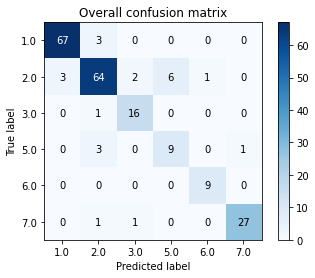

In [37]:
# Generating overall confusion matrix

import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(actual_classes, predicted_classes, title='Overall confusion matrix')

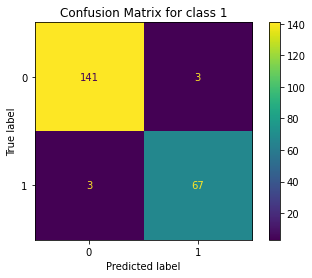

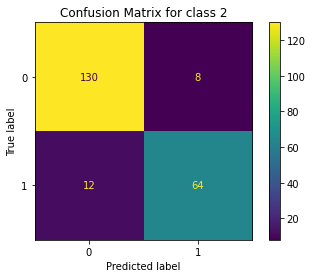

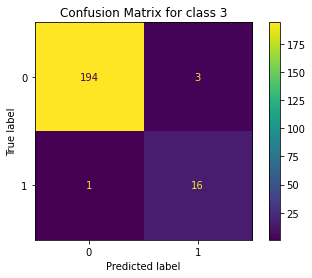

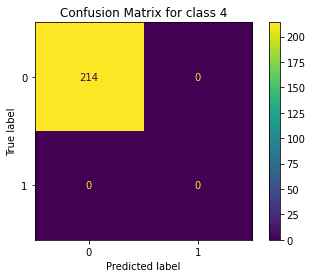

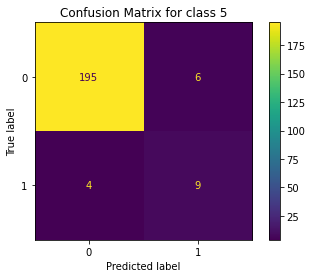

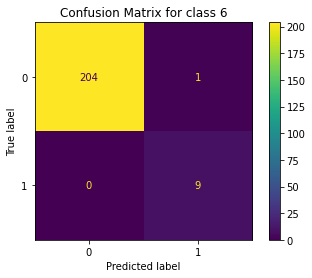

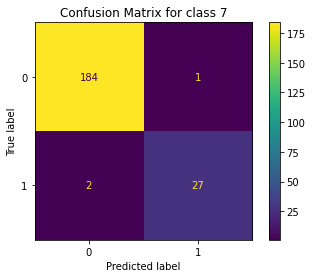

In [38]:
# Generating the confusion matrix for each classes

from sklearn.metrics import ConfusionMatrixDisplay

for x in range(7):
  cm_display = ConfusionMatrixDisplay(cm[x]).plot()
  plt.title(f"Confusion Matrix for class {x+1}")
  plt.show()
